In [ ]:
pip install scikit-learn

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import rasterio
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
# Open the raster file
file_path = "D:\College files\TISS\Data\Sentinal.tif"
satellite_data = rasterio.open(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_19200\2259315246.py:2: SyntaxWarning: invalid escape sequence '\C'
  file_path = "D:\College files\TISS\Data\Sentinal.tif"


In [17]:
# Read the raster bands
red_band = satellite_data.read(3)
green_band = satellite_data.read(2)
blue_band = satellite_data.read(1)

In [18]:
# Stack the bands into a 2D array
stacked_bands = np.dstack((red_band, green_band, blue_band))

In [19]:
# Reshape the array to (n_pixels, n_bands)
reshaped_bands = stacked_bands.reshape((-1, stacked_bands.shape[2]))

In [20]:
# Apply k-means clustering
n_clusters = 5  # Adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(reshaped_bands)

In [21]:
# Reshape the labels back to the original image shape
clustered_image = kmeans.labels_.reshape(red_band.shape)

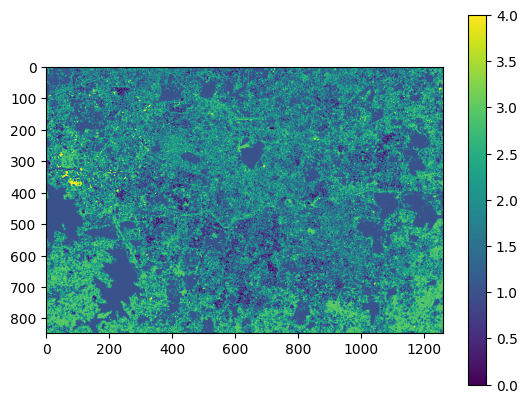

In [22]:
# Display the segmented image
# You can use other colormaps as needed
plt.imshow(clustered_image, cmap='viridis')
plt.colorbar()
plt.show()